# Tehtävä 1
Opetellaan Fourier-muunnoksen toiminta seuraavasti:
Tehdään testisignaali, jossa on N = 10 näytettä.
Näytetaajuus Fs = 100
taajuusresoluutio on siis Fs/N = 10 Hz
Tarkoittaa siis sitä, että fourier-muunnostuloksessa on 10 tulosta ja
ne tarkoittavat eri taajuuksia seuraavasti:
X(0) = 0Hz
X(1) = 10 Hz
X(2) = 20 Hz
X(3) = 30 Hz
X(4) = 40 Hz
X(5) = 50 Hz
X(6) = -40 Hz
X(7) = -30 Hz
X(8) = -20 Hz
X(9) = -10 Hz

a) Tehdään 10 Hz taajuinen kosini signaali, joka on näytteistetty
   taajuudella Fs = 100. Otetaan tuosta signaalista ensimmäiset
   10 näytettä eli N = 10. Tulostetaan kuva plt.subplot() funktion avulla
   siten, että kuvassa on 10 riviä ja 2 saraketta seuraavasti:
   riville 1 => X(0) laskennassa käytetyt "referenssi signaalit"
   riville 2 => X(1) laskennassa käytetyt "referenssi signaalit"
   ...
   riville 10 => X(9) laskennan ref signaalit.

b) Nopeille: Tee python aliohjelma, jolla voit laskea fourier-muunnos kaavan
   mukaiset tulokset. Vinkki: Tee joku testisignaali, josta lasket
   FFt:n np.fft.fft(signaali) -funktion avulla ja värkkäät sitten niin
   kauan, että oma funktiosi antaa saman tuloksen kuin numPy:n funktio

100


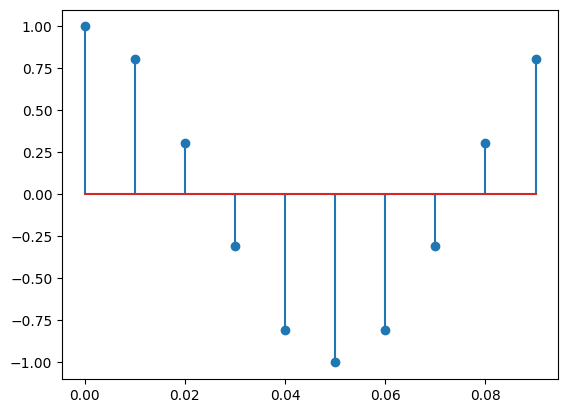

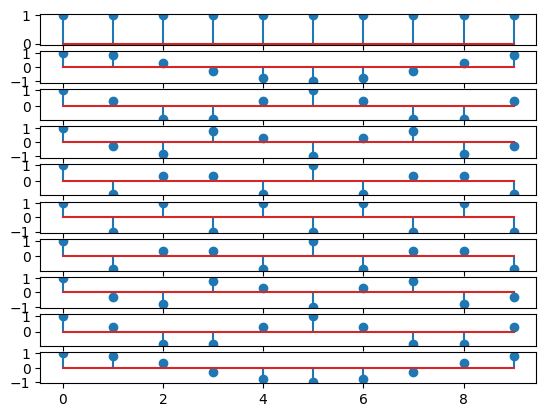

In [50]:
import numpy as np
import matplotlib.pyplot as plt
Fs = 100
Ts =1/Fs
N = 10

t = np.arange(0,1,Ts)
M = len(t)
print(M)
sig = np.cos(2*np.pi*10*t)
plt.stem(t[0:N],sig[0:N])
plt.show()

testisignaali = sig[0:N]
#print(testiSignaali)
i= complex(0,1)

vertailuSignaali = np.zeros((10,10), dtype=complex)

#print(vertailuSignaali)

 
plt.subplot(10,1,1)
for k in range(N):
    #print(k)
    plt.subplot(10,1,k+1)
    for n in range(N):
        vertailuSignaali[k][n] = np.exp(-i*(2*np.pi*k*n)/N)
    plt.stem(np.real(vertailuSignaali[k][0:N]))
#plt.subplot(10,2,2)
#plt.stem(t[0:N], np.imag(vertailuSignaali))
plt.show()

#print(vertailuSignaali)


# Tehtävä 2

Opetellaan kuvan suodattaminen. käytetään cameraman.png tiedoston kuva

a) suodatetaan ensin kuva numpyn ja pythonin eri kirjastofunktioiden avulla. Etsitään esimerkkejä miten tuo tehdään chatGPT:n avulla

b) tehdään oma funktio, joka tekee samanlaisen kuvan suodatuksen

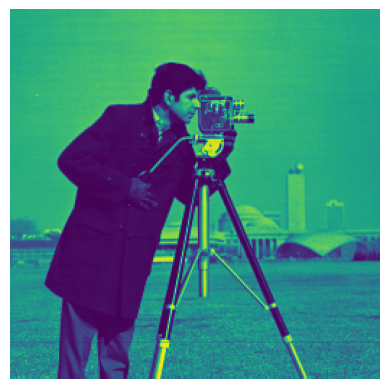

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('./cameraman.png')
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()



suodatuksessa:

suodattimet: 
(256, 256)
(256, 256)
[[ 1.11111111e-01 -4.44444444e-01  0.00000000e+00  3.33333333e-01
   3.33333333e-01  3.33333333e-01 -4.44444444e-01  2.22222222e-01
  -1.11111111e-01 -2.22222222e-01]
 [-4.44444444e-01  4.44444444e-01  0.00000000e+00  3.33333333e-01
   3.33333333e-01  0.00000000e+00 -2.22222222e-01  4.44444444e-01
  -5.55555556e-01 -7.77777778e-01]
 [-2.22222222e-01  6.66666667e-01  4.44444444e-01 -2.22222222e-01
  -1.11111111e-01  1.11111111e-01 -3.33333333e-01  4.44444444e-01
  -2.22222222e-01 -6.66666667e-01]
 [-4.44444444e-01  1.33333333e+00  5.55555556e-01 -1.11111111e-01
  -6.66666667e-01 -2.22222222e-01  3.33333333e-01  4.44444444e-01
  -7.77777778e-01 -1.33333333e+00]
 [ 0.00000000e+00  1.22222222e+00  1.11111111e-01 -3.33333333e-01
  -6.66666667e-01 -1.11111111e-01  6.66666667e-01  3.33333333e-01
  -6.66666667e-01 -8.88888889e-01]
 [-2.22222222e-01  4.44444444e-01 -3.33333333e-01  2.22222222e-01
  -2.22222222e-01  1.11111111e-01  1.33333333e+

Text(0.5, 1.0, 'Original Image')

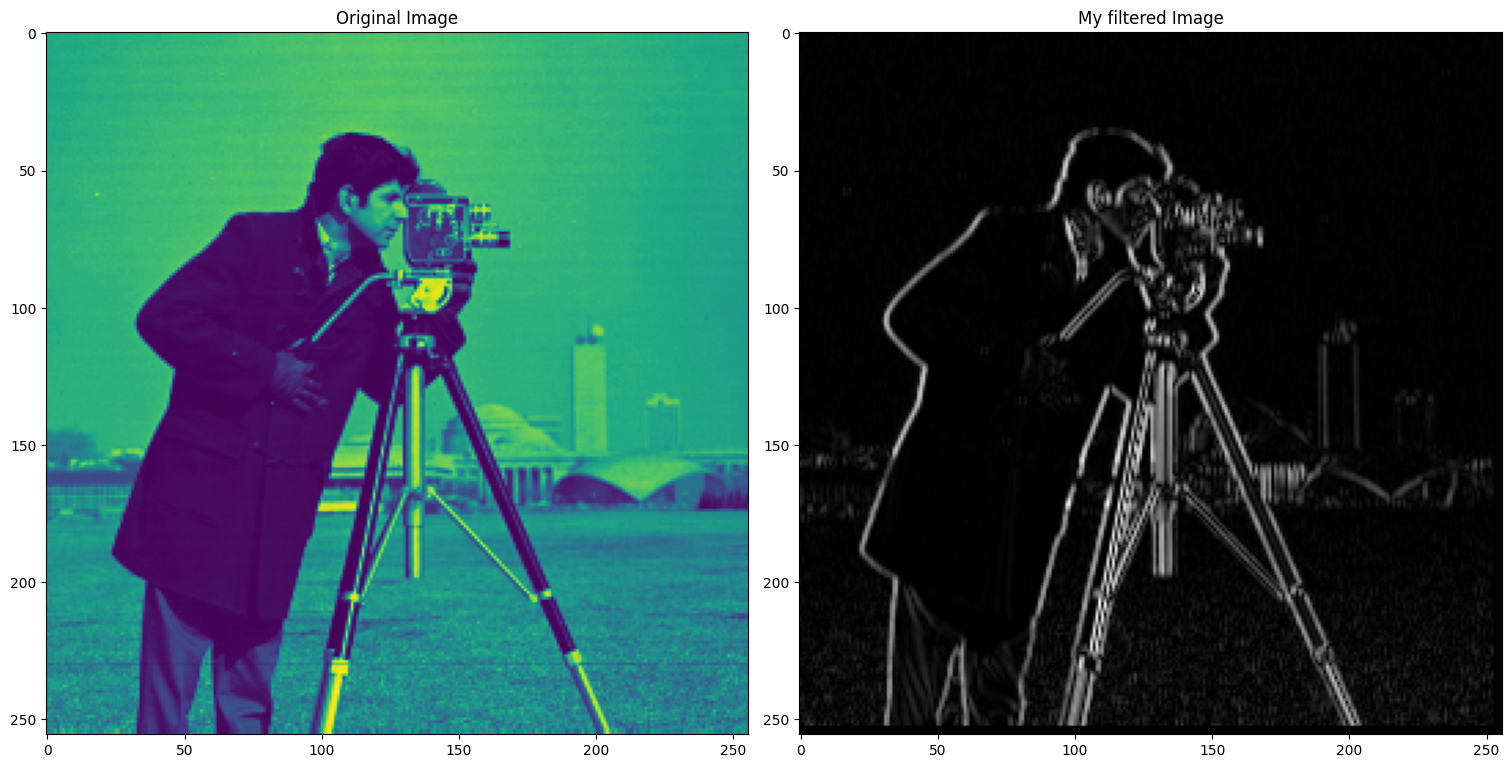

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def lueKuva(image):
    image = Image.open('./cameraman.png')
    print(image)
    print(image.size)

    pic = np.array(image)
    print(pic) # Tulostaa 256*256 taulukon joka lyhennetään tulosteeseen.

    plt.imshow(image) # Kumpikin tulostaa kuvan näkösälle, toinen vain tehdään taulukosta.
    #plt.imshow(pic)
    plt.axis('off')
    plt.show()
def suodata(kuva):
    print("suodatuksessa:")
    print()
    print("suodattimet: ")
    suodatin1 = np.array([[1/9,1/9,1/9],
                          [1/9,1/9,1/9],
                          [1/9,1/9,1/9]])
    suodatin2 = np.array([[-1/9, 0, 1/9],
                          [-1/9, 0, 1/9],
                          [-1/9, 0, 1/9]])

    suodatettu = np.zeros((kuva.shape[0], kuva.shape[1]))
    #pieni_slice = kuva[0:3,0:3]
    #print(pieni_slice)
    #print(pieni_slice.flatten())
    #print(np.sum(pieni_slice.flatten()))
    mrow=0
    mcol=0
    for cols in range(kuva.shape[0]-3):
        for rows in range(kuva.shape[1]-3):
            
            value = (kuva[cols:cols+3, rows:rows+3] * suodatin1[:,:])
            value = (kuva[cols:cols+3, rows:rows+3] * suodatin2[:,:])
            #print(np.sum(value))
            suodatettu[cols][rows] = np.sum(value)
    print(kuva.shape)
    print(suodatettu.shape)
    print(suodatettu[0:10,0:10])
    suodatettu=np.abs(suodatettu)
    return suodatettu

# Lue kuva tiedostosta
image = Image.open('./cameraman.png')

# Muunna kuva NumPy-taulukoksi
image_array = np.array(image,dtype=np.int16)

suodatettu=suodata(image_array)

fig, ax = plt.subplots(1,2,figsize=(15,15), constrained_layout=True)

ax[0].imshow(image_array)
ax[1].imshow(suodatettu,cmap='gray')
ax[1].set_title('My filtered Image')
ax[0].set_title('Original Image')
#ax[1].set_title('Filtered Image')



#fig.set_facecolor('lightsteelblue')